<a href="https://colab.research.google.com/github/aravindh698/rep2/blob/master/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('ASHOKA.csv')
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ASHOKA,EQ,15-May-2017,210.35,211.0,217.5,206.15,216.30,216.05,212.63,159997,34020520.45,3506,88509,55.32
1,ASHOKA,EQ,16-May-2017,216.05,212.3,216.0,211.00,214.00,214.90,213.24,213214,45466299.10,2860,151941,71.26
2,ASHOKA,EQ,17-May-2017,214.90,214.3,218.7,212.10,216.55,217.00,215.97,383131,82743402.10,3297,261939,68.37
3,ASHOKA,EQ,18-May-2017,217.00,216.0,216.6,208.00,210.00,209.65,211.74,78709,16665707.55,1372,35458,45.05
4,ASHOKA,EQ,19-May-2017,209.65,212.1,213.9,205.05,206.05,206.25,209.95,398725,83713500.05,2060,301747,75.68


In [4]:
df['Pcd_change']=df['Close Price'].pct_change()
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Pcd_change
0,ASHOKA,EQ,15-May-2017,210.35,211.0,217.5,206.15,216.30,216.05,212.63,159997,34020520.45,3506,88509,55.32,NaN
1,ASHOKA,EQ,16-May-2017,216.05,212.3,216.0,211.00,214.00,214.90,213.24,213214,45466299.10,2860,151941,71.26,-0.005323
2,ASHOKA,EQ,17-May-2017,214.90,214.3,218.7,212.10,216.55,217.00,215.97,383131,82743402.10,3297,261939,68.37,0.009772
3,ASHOKA,EQ,18-May-2017,217.00,216.0,216.6,208.00,210.00,209.65,211.74,78709,16665707.55,1372,35458,45.05,-0.033871
4,ASHOKA,EQ,19-May-2017,209.65,212.1,213.9,205.05,206.05,206.25,209.95,398725,83713500.05,2060,301747,75.68,-0.016218


In [5]:
df['mean']=np.mean(df['Pcd_change'])
df['scaled_mean']=((1+np.mean(df['Pcd_change']))**252)-1
df['std']=np.std(df['Pcd_change'])
df['scaled_std']=np.std(df['Pcd_change']) * np.sqrt(252)


In [10]:
aj=pd.read_csv('AJANTPHARM.csv')
ap=pd.read_csv('APOLLOTYRE.csv')
cen=pd.read_csv('CENTURYPLY.csv')
fo=pd.read_csv('FORTIS.csv')

In [12]:
 for stock_df in (aj, ap,df,cen,fo): 
	stock_df['Normed Return'] = stock_df['Close Price'] /stock_df.iloc[0]['Close Price']


In [14]:
for stock_df, allo in zip((aj,ap,df,cen,fo),[.2,.3,.3,.1,.1]):
	stock_df['Allocation'] = stock_df['Normed Return']*allo


In [16]:
for stock_df in (aj,ap,df,cen,fo):
	stock_df['Position Value'] = stock_df['Allocation']*1000000


In [17]:
# create list of all position values
all_pos_vals = [aj['Position Value'],ap['Position Value'],df['Position Value'],cen['Position Value'],fo['Position Value']]

# concatenate the list of position values
portfolio_val = pd.concat(all_pos_vals, axis=1)

# set the column names
portfolio_val.columns = ['aj', 'ap', 'df', 'cen','fo']

# add a total portfolio column
portfolio_val['Total'] = portfolio_val.sum(axis=1)


In [22]:
portfolio_val.head()
portfolio_val.set_index(stock_df['Date'],inplace=True)
portfolio_val.head()


,aj,ap,df,cen,fo,Total
Date,,,,,,
15-May-2017,200000.000000,300000.000000,300000.000000,100000.000000,100000.000000,1.000000e+06
16-May-2017,200091.827365,303234.152652,298403.147420,99793.737109,101291.108404,1.002814e+06
17-May-2017,202552.800735,307050.452781,301319.139088,99324.957810,100316.686967,1.010564e+06
18-May-2017,199987.756351,300970.245796,291113.168248,97637.352335,95907.429963,9.856160e+05
19-May-2017,204499.540863,303557.567917,286392.038880,95274.704669,99171.741778,9.888956e+05


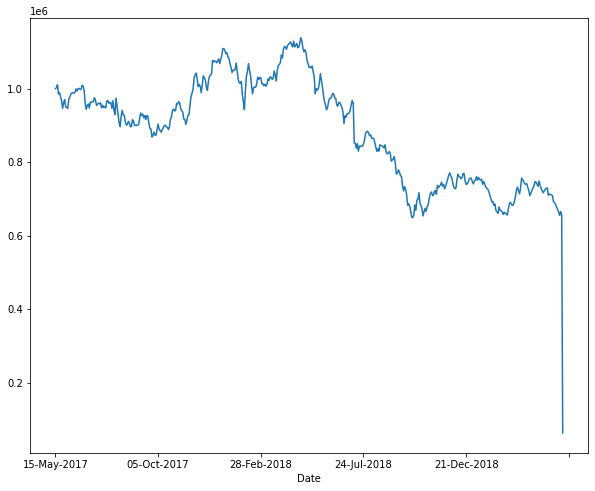

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
portfolio_val['Total'].plot(figsize=(10,8))


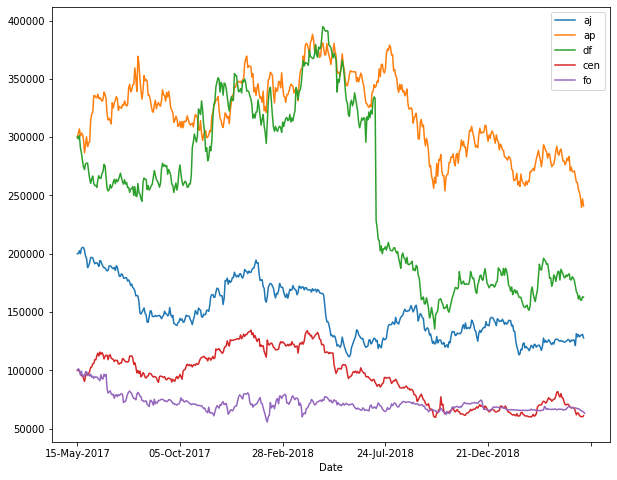

In [24]:
portfolio_val.drop('Total',axis=1).plot(figsize=(10,8))

In [26]:
portfolio_val['Daily Return'] = portfolio_val['Total'].pct_change(1)
portfolio_val.head()

,aj,ap,df,cen,fo,Total,Daily Return
Date,,,,,,,
15-May-2017,200000.000000,300000.000000,300000.000000,100000.000000,100000.000000,1.000000e+06,NaN
16-May-2017,200091.827365,303234.152652,298403.147420,99793.737109,101291.108404,1.002814e+06,0.002814
17-May-2017,202552.800735,307050.452781,301319.139088,99324.957810,100316.686967,1.010564e+06,0.007728
18-May-2017,199987.756351,300970.245796,291113.168248,97637.352335,95907.429963,9.856160e+05,-0.024687
19-May-2017,204499.540863,303557.567917,286392.038880,95274.704669,99171.741778,9.888956e+05,0.003328


In [27]:
portfolio_val['Daily Return'].mean()

# standard deviation
portfolio_val['Daily Return'].std()


0.04330252693516767

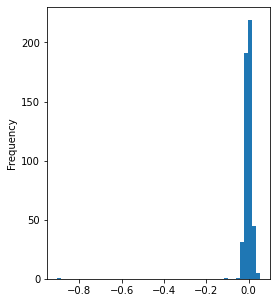

In [28]:
portfolio_val['Daily Return'].plot(kind='hist', bins=50, figsize=(4,5))

In [29]:
cum_return = 100 * (portfolio_val['Total'][-1]/portfolio_val['Total'][0] - 1)


In [30]:
sharpe_ratio = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()


In [31]:
ASR = (252**0.5) * sharpe_ratio


In [38]:
stocks=pd.DataFrame({'AJANTPHARM':aj['Close Price'],
                  'APOLLO':ap['Close Price'],
                  'ASHOKA':df['Close Price'],
                  'CENTURYPLY':cen['Close Price'],
                  'FORTIS':fo['Close Price']})
stocks.set_index(stock_df['Date'],inplace=True)
stocks.head()


,AJANTPHARM,APOLLO,ASHOKA,CENTURYPLY,FORTIS
Date,,,,,
15-May-2017,1633.50,231.90,216.05,266.65,205.25
16-May-2017,1634.25,234.40,214.90,266.10,207.90
17-May-2017,1654.35,237.35,217.00,264.85,205.90
18-May-2017,1633.40,232.65,209.65,260.35,196.85
19-May-2017,1670.25,234.65,206.25,254.05,203.55


In [39]:
stocks.pct_change(1).mean()


AJANTPHARM   -0.000689
APOLLO       -0.000255
ASHOKA       -0.000826
CENTURYPLY   -0.000722
FORTIS       -0.000577
dtype: float64

In [40]:
stocks.pct_change(1).head()


,AJANTPHARM,APOLLO,ASHOKA,CENTURYPLY,FORTIS
Date,,,,,
15-May-2017,NaN,NaN,NaN,NaN,NaN
16-May-2017,0.000459,0.010781,-0.005323,-0.002063,0.012911
17-May-2017,0.012299,0.012585,0.009772,-0.004697,-0.009620
18-May-2017,-0.012664,-0.019802,-0.033871,-0.016991,-0.043953
19-May-2017,0.022560,0.008597,-0.016218,-0.024198,0.034036


In [42]:
log_return = np.log(stocks/stocks.shift(1))
log_return.head()

,AJANTPHARM,APOLLO,ASHOKA,CENTURYPLY,FORTIS
Date,,,,,
15-May-2017,NaN,NaN,NaN,NaN,NaN
16-May-2017,0.000459,0.010723,-0.005337,-0.002065,0.012828
17-May-2017,0.012224,0.012507,0.009725,-0.004709,-0.009667
18-May-2017,-0.012744,-0.020001,-0.034458,-0.017137,-0.044949
19-May-2017,0.022310,0.008560,-0.016350,-0.024496,0.033470


In [45]:
print(stocks.columns)

weights = np.array(np.random.random(5))
print('Random Weights:')
print(weights)

print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

# expected return
print('Expected Portfolio Return')
exp_ret = np.sum((log_return.mean()*weights)*252)
print(exp_ret)

# expected volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))
print(exp_vol)

# Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)


Index(['AJANTPHARM', 'APOLLO', 'ASHOKA', 'CENTURYPLY', 'FORTIS'], dtype='object')
Random Weights:
[0.58917853 0.35426407 0.54068301 0.09397339 0.56530699]
Rebalance
[0.27487958 0.1652809  0.25225413 0.04384302 0.26374238]
Expected Portfolio Return
-0.23319455215627474
Expected Volatility
0.23166326837003828
Sharpe Ratio
-1.0066099550308965


In [47]:
num_ports = 5000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports): 
    # weights 
    weights = np.array(np.random.random(5)) 
    weights = weights/np.sum(weights)  
	
    # save the weights
    all_weights[ind,:] = weights
	
    # expected return 
    ret_arr[ind] = np.sum((log_return.mean()*weights)*252)

    # expected volatility 
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))

    # Sharpe Ratio 
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [50]:
sharpe_arr.argmax()
all_weights[636:]

array([[0.09997084, 0.75420614, 0.01392462, 0.09224907, 0.03964933],
       [0.32666248, 0.08923361, 0.13315711, 0.25575692, 0.19518988],
       [0.07847561, 0.3927636 , 0.32096912, 0.04271215, 0.16507952],
       ...,
       [0.04044152, 0.31214374, 0.25099905, 0.27574776, 0.12066793],
       [0.21275424, 0.2677496 , 0.02374756, 0.19103587, 0.30471273],
       [0.11162327, 0.16312092, 0.23681634, 0.23642513, 0.25201435]])

Text(0, 0.5, 'Return')

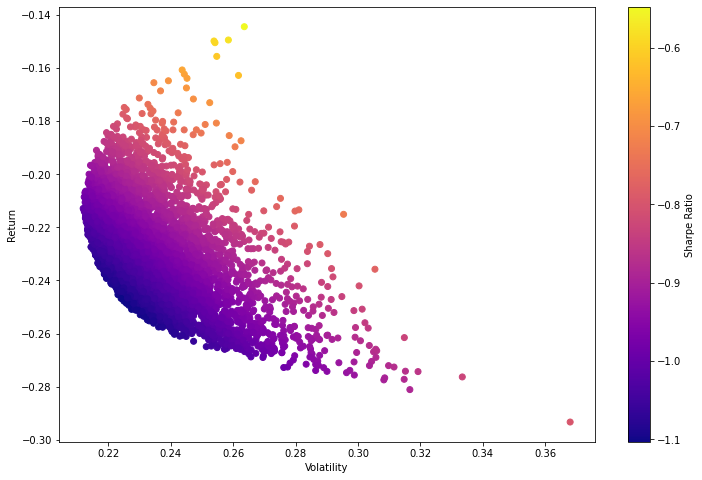

In [51]:
# plot the data
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')


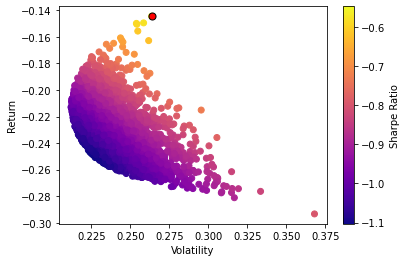

In [54]:
max_sr_ret = ret_arr[636]
max_sr_vol = vol_arr[636]
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# add a red dot for max_sr_vol & max_sr_ret
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black')
